In [57]:
import sys
sys.path.append('../')

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from utils.svm import SVM

In [59]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [111]:
def plot_svm(svm, x, y, y_pred, title="SVM Decision Boundary"):

    # plot data points
    plt.figure(figsize=(10, 6))
    colors = ['purple', 'red']
    levels = [-1, 1]
    cmap, norm = mpl.from_levels_and_colors(levels=levels, colors=colors, extend='max')
    plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], c=y[y_pred>=0], cmap=cmap, norm=norm, marker='o', s=50)
    plt.scatter(x[y_pred==-1, 0], x[y_pred==-1, 1], c=y[y_pred<0], cmap=cmap, norm=norm, marker='x', s=50)

    # plot hyperplane
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    yy = np.linspace(ylim[0], ylim[1])
    xx = - (yy * svm.best_w[1] + svm.best_b) / svm.best_w[0]
    plt.plot(xx, yy, 'c-')

    # plot margins
    xx = - (yy * svm.best_w[1] + svm.best_b - 1) / svm.best_w[0]
    plt.plot(xx, yy, 'y--')
    xx = - (yy * svm.best_w[1] + svm.best_b + 1) / svm.best_w[0]
    plt.plot(xx, yy, 'y--')

    # title and labels
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    
    # legend
    legend_elements = [ 
                        Patch(facecolor='r', edgecolor='r', label='Class 1'),
                        Patch(facecolor='purple', edgecolor='purple', label='Class 2'),
                        Line2D([0], [0], color='c', lw=2, label='Hyperplane'),
                        Line2D([0], [0], linestyle='dashed', color='y', lw=2, label='Margins'),
                        Line2D([], [], linestyle='None', marker='o', color='k', label='Predicted Class 1', markerfacecolor='k', markersize=10),
                        Line2D([], [], linestyle='None', marker='x', color='k', label='Predicted Class 2', markersize=10)
                      ]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.23, 1.01))

    plt.show()

In [61]:
df_LS = pd.read_csv('../data/TP3-1.csv')
x_LS = df_LS[["X", "Y"]].to_numpy()
y_LS = df_LS["Label"].to_numpy()
svm1 = SVM(c=1000, batch_size=1, epochs=10000, initial_learning_rate=0.00001, decay_rate=0.000001)
svm1.fit(x_LS, y_LS)
pred_LS = svm1.predict(x_LS)

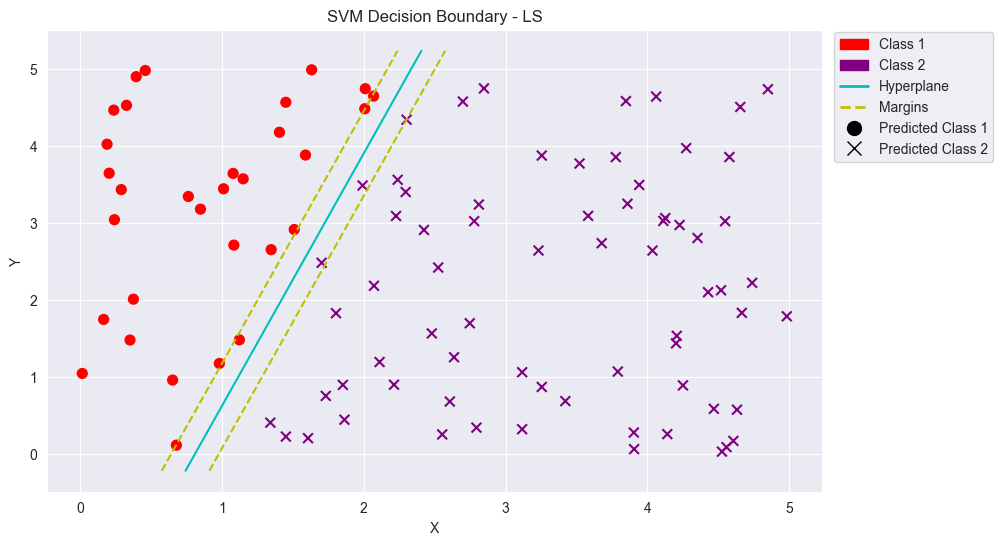

In [112]:
plot_svm(svm1, x_LS, y_LS, pred_LS, "SVM Decision Boundary - LS")

In [63]:
df_OUTL = pd.read_csv('../data/TP3-2.csv')
x_OUTL = df_OUTL[["X", "Y"]].to_numpy()
y_OUTL = df_OUTL["Label"].to_numpy()
svm2 = SVM(c=7, batch_size=1, epochs=10000, initial_learning_rate=0.00001, decay_rate=0.000001)
svm2.fit(x_OUTL, y_OUTL)
pred_OUTL = svm2.predict(x_OUTL)

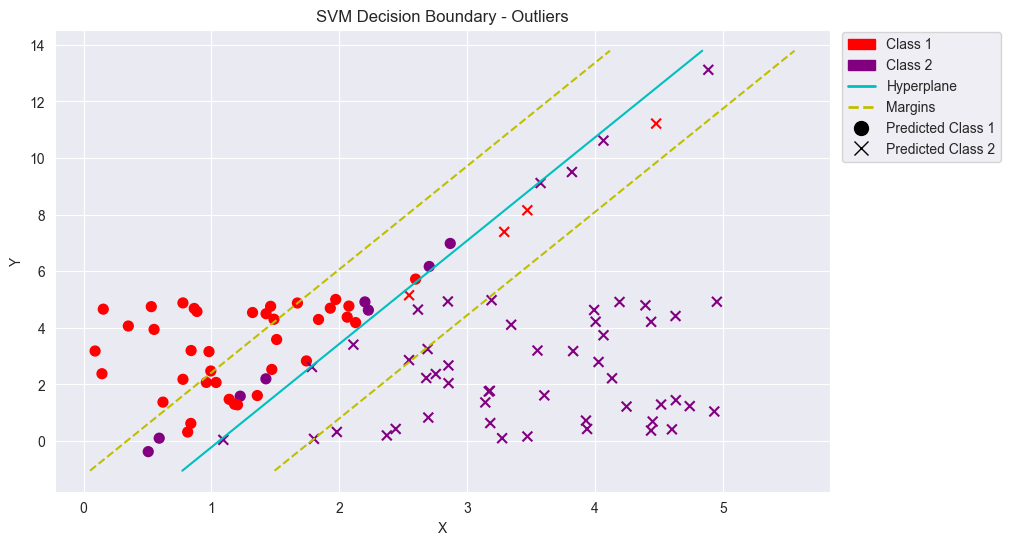

In [113]:
plot_svm(svm2, x_OUTL, y_OUTL, pred_OUTL, "SVM Decision Boundary - Outliers")